In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222776, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222775, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225,-25.518269
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260,-25.517944
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260,-25.517942
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517965
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450,-25.517944


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12127    17    2   
2020-01-01 17:05:00  1.12125  1.12125  1.12127         1.12127    17    2   
2020-01-01 17:10:00  1.12127  1.12123  1.12127         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12146    17    2   
2020-01-01 17:20:00  1.12144  1.12137  1.12153         1.12146    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00005   1.121225  0.00033    1.121225 -25.518269  
2020-01-01 17:05:00     1  -0.00002   1.121260  0.00002    1.121260 -25.517944  
2020-01-01 17:10:00     1   0.00000   1.121250  0.00004    1.121260 -25.517942  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178220
178220
22000
22000
22555
22555


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178220, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178195, 24, 12)
(21975, 24, 12)
(22530, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178195, 1)
(21975, 1)
(22530, 1)


array([[0.433537  ],
       [0.43318605],
       [0.43218327],
       ...,
       [0.11842871],
       [0.11737537],
       [0.11872959]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.433537  , 0.43318605, 0.43218327, ..., 0.11842871, 0.11737537,
       0.11872959], dtype=float32)

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD5_LSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 1034.0969 - mae: 10.1004 - mse: 1034.0969 - root_mean_squared_error: 32.1574 - mape: 14306.2744
Epoch 1: val_mse improved from inf to 0.18417, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 33s 53ms/step - loss: 1034.0969 - mae: 10.1004 - mse: 1034.0969 - root_mean_squared_error: 32.1574 - mape: 14306.2744 - val_loss: 0.1842 - val_mae: 0.3640 - val_mse: 0.1842 - val_root_mean_squared_error: 0.4292 - val_mape: 36742.5547
Epoch 2/60
462/463 [============================>.] - ETA: 0s - loss: 0.0701 - mae: 0.2143 - mse: 0.0701 - root_mean_squared_error: 0.2647 - mape: 3562.1072
Epoch 2: val_mse improved from 0.18417 to 0.09284, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 41ms/step - loss: 0.0701 - mae: 0.2143 - mse: 0.0701 - root_mean_squared_error: 0.2647 - mape: 3555.7124 - val_loss: 0.0928 - val_mae: 0.2707 - val_mse: 0.0928 - val_root_mean_squared_error: 0.3047 - val_mape: 27172.8184
Epoch 3/60
462/463 [============================>.] - ETA: 0s - loss: 0.0566 - mae: 0.2052 - mse: 0.0566 - root_mean_squared_error: 0.2378 - mape: 4166.8232
Epoch 3: val_mse improved from 0.09284 to 0.08759, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 20s 44ms/step - loss: 0.0566 - mae: 0.2052 - mse: 0.0566 - root_mean_squared_error: 0.2378 - mape: 4159.4082 - val_loss: 0.0876 - val_mae: 0.2655 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2959 - val_mape: 25986.8477
Epoch 4/60
460/463 [============================>.] - ETA: 0s - loss: 0.0562 - mae: 0.2053 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 4476.0894
Epoch 4: val_mse improved from 0.08759 to 0.08727, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 41ms/step - loss: 0.0562 - mae: 0.2054 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 4448.9888 - val_loss: 0.0873 - val_mae: 0.2651 - val_mse: 0.0873 - val_root_mean_squared_error: 0.2954 - val_mape: 25903.4961
Epoch 5/60
462/463 [============================>.] - ETA: 0s - loss: 0.0563 - mae: 0.2055 - mse: 0.0563 - root_mean_squared_error: 0.2372 - mape: 3268.5117
Epoch 5: val_mse improved from 0.08727 to 0.08713, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 41ms/step - loss: 0.0562 - mae: 0.2055 - mse: 0.0562 - root_mean_squared_error: 0.2372 - mape: 3262.6765 - val_loss: 0.0871 - val_mae: 0.2650 - val_mse: 0.0871 - val_root_mean_squared_error: 0.2952 - val_mape: 25868.1738
Epoch 6/60
462/463 [============================>.] - ETA: 0s - loss: 0.0562 - mae: 0.2056 - mse: 0.0562 - root_mean_squared_error: 0.2372 - mape: 3531.4431
Epoch 6: val_mse did not improve from 0.08713
463/463 [==============================] - 7s 16ms/step - loss: 0.0562 - mae: 0.2056 - mse: 0.0562 - root_mean_squared_error: 0.2372 - mape: 3525.1152 - val_loss: 0.0874 - val_mae: 0.2653 - val_mse: 0.0874 - val_root_mean_squared_error: 0.2956 - val_mape: 25938.3594
Epoch 7/60
460/463 [============================>.] - ETA: 0s - loss: 0.0562 - mae: 0.2054 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 3022.8545
Epoch 7: val_mse did not improve from 0.08713
463/463 [==============================] - 7s 16ms/step - l

463/463 [==============================] - 19s 42ms/step - loss: 0.0562 - mae: 0.2055 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 3202.0396 - val_loss: 0.0870 - val_mae: 0.2648 - val_mse: 0.0870 - val_root_mean_squared_error: 0.2949 - val_mape: 25821.1699
Epoch 9/60
463/463 [==============================] - ETA: 0s - loss: 0.0562 - mae: 0.2055 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 3312.0596
Epoch 9: val_mse did not improve from 0.08696
463/463 [==============================] - 7s 15ms/step - loss: 0.0562 - mae: 0.2055 - mse: 0.0562 - root_mean_squared_error: 0.2371 - mape: 3312.0596 - val_loss: 0.0874 - val_mae: 0.2653 - val_mse: 0.0874 - val_root_mean_squared_error: 0.2957 - val_mape: 25950.4629
Epoch 10/60
462/463 [============================>.] - ETA: 0s - loss: 0.0561 - mae: 0.2055 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 3007.1812
Epoch 10: val_mse did not improve from 0.08696
463/463 [==============================] - 7s 15ms/step -

463/463 [==============================] - 18s 39ms/step - loss: 0.0557 - mae: 0.2047 - mse: 0.0557 - root_mean_squared_error: 0.2361 - mape: 3622.8557 - val_loss: 0.0870 - val_mae: 0.2645 - val_mse: 0.0870 - val_root_mean_squared_error: 0.2949 - val_mape: 25902.0684
Epoch 24/60
462/463 [============================>.] - ETA: 0s - loss: 0.0477 - mae: 0.1849 - mse: 0.0477 - root_mean_squared_error: 0.2185 - mape: 3338.1125
Epoch 24: val_mse improved from 0.08695 to 0.02084, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 39ms/step - loss: 0.0477 - mae: 0.1847 - mse: 0.0477 - root_mean_squared_error: 0.2183 - mape: 3332.0771 - val_loss: 0.0208 - val_mae: 0.1156 - val_mse: 0.0208 - val_root_mean_squared_error: 0.1444 - val_mape: 15842.2295
Epoch 25/60
462/463 [============================>.] - ETA: 0s - loss: 0.0066 - mae: 0.0610 - mse: 0.0066 - root_mean_squared_error: 0.0810 - mape: 1527.2969
Epoch 25: val_mse improved from 0.02084 to 0.00518, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 40ms/step - loss: 0.0066 - mae: 0.0609 - mse: 0.0066 - root_mean_squared_error: 0.0810 - mape: 1524.5343 - val_loss: 0.0052 - val_mae: 0.0519 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0720 - val_mape: 11354.8789
Epoch 26/60
461/463 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0462 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 1256.0752
Epoch 26: val_mse improved from 0.00518 to 0.00361, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 0.0037 - mae: 0.0462 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 1251.1257 - val_loss: 0.0036 - val_mae: 0.0402 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0601 - val_mape: 10292.9385
Epoch 27/60
463/463 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0404 - mse: 0.0029 - root_mean_squared_error: 0.0534 - mape: 1180.3171
Epoch 27: val_mse improved from 0.00361 to 0.00281, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 41ms/step - loss: 0.0029 - mae: 0.0404 - mse: 0.0029 - root_mean_squared_error: 0.0534 - mape: 1180.3171 - val_loss: 0.0028 - val_mae: 0.0368 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 9224.3799
Epoch 28/60
460/463 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1157.4579
Epoch 28: val_mse improved from 0.00281 to 0.00227, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1150.4135 - val_loss: 0.0023 - val_mae: 0.0345 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0476 - val_mape: 8525.3408
Epoch 29/60
461/463 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 934.5758
Epoch 29: val_mse improved from 0.00227 to 0.00171, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 930.8828 - val_loss: 0.0017 - val_mae: 0.0293 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 7863.3530
Epoch 30/60
463/463 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 895.5814
Epoch 30: val_mse improved from 0.00171 to 0.00126, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 895.5814 - val_loss: 0.0013 - val_mae: 0.0251 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 7096.7075
Epoch 31/60
462/463 [============================>.] - ETA: 0s - loss: 9.5953e-04 - mae: 0.0240 - mse: 9.5953e-04 - root_mean_squared_error: 0.0310 - mape: 895.3348
Epoch 31: val_mse improved from 0.00126 to 0.00104, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 40ms/step - loss: 9.5907e-04 - mae: 0.0240 - mse: 9.5907e-04 - root_mean_squared_error: 0.0310 - mape: 893.7192 - val_loss: 0.0010 - val_mae: 0.0251 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 6022.4854
Epoch 32/60
463/463 [==============================] - ETA: 0s - loss: 6.8975e-04 - mae: 0.0204 - mse: 6.8975e-04 - root_mean_squared_error: 0.0263 - mape: 625.9687
Epoch 32: val_mse improved from 0.00104 to 0.00060, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 39ms/step - loss: 6.8975e-04 - mae: 0.0204 - mse: 6.8975e-04 - root_mean_squared_error: 0.0263 - mape: 625.9687 - val_loss: 5.9930e-04 - val_mae: 0.0172 - val_mse: 5.9930e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 5362.1240
Epoch 33/60
462/463 [============================>.] - ETA: 0s - loss: 5.1701e-04 - mae: 0.0176 - mse: 5.1701e-04 - root_mean_squared_error: 0.0227 - mape: 644.0581
Epoch 33: val_mse did not improve from 0.00060
463/463 [==============================] - 7s 16ms/step - loss: 5.1701e-04 - mae: 0.0176 - mse: 5.1701e-04 - root_mean_squared_error: 0.0227 - mape: 642.8969 - val_loss: 6.0497e-04 - val_mae: 0.0185 - val_mse: 6.0497e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 4916.4292
Epoch 34/60
462/463 [============================>.] - ETA: 0s - loss: 4.3529e-04 - mae: 0.0162 - mse: 4.3529e-04 - root_mean_squared_error: 0.0209 - mape: 677.2042
Epoch 34: val_mse improved from 0.00060 to 0.00048, saving m

463/463 [==============================] - 19s 42ms/step - loss: 4.3514e-04 - mae: 0.0162 - mse: 4.3514e-04 - root_mean_squared_error: 0.0209 - mape: 675.9778 - val_loss: 4.7969e-04 - val_mae: 0.0156 - val_mse: 4.7969e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 4665.9463
Epoch 35/60
460/463 [============================>.] - ETA: 0s - loss: 3.7502e-04 - mae: 0.0150 - mse: 3.7502e-04 - root_mean_squared_error: 0.0194 - mape: 672.5850
Epoch 35: val_mse did not improve from 0.00048
463/463 [==============================] - 7s 16ms/step - loss: 3.7509e-04 - mae: 0.0150 - mse: 3.7509e-04 - root_mean_squared_error: 0.0194 - mape: 668.5838 - val_loss: 8.4947e-04 - val_mae: 0.0242 - val_mse: 8.4947e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 4310.6187
Epoch 36/60
460/463 [============================>.] - ETA: 0s - loss: 3.3415e-04 - mae: 0.0142 - mse: 3.3415e-04 - root_mean_squared_error: 0.0183 - mape: 540.7283
Epoch 36: val_mse did not improve from 0.00048
463/463 [====

463/463 [==============================] - 18s 39ms/step - loss: 2.1809e-04 - mae: 0.0116 - mse: 2.1809e-04 - root_mean_squared_error: 0.0148 - mape: 323.0805 - val_loss: 4.7284e-04 - val_mae: 0.0166 - val_mse: 4.7284e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 3229.3650
Epoch 41/60
460/463 [============================>.] - ETA: 0s - loss: 1.9691e-04 - mae: 0.0110 - mse: 1.9691e-04 - root_mean_squared_error: 0.0140 - mape: 237.5388
Epoch 41: val_mse did not improve from 0.00047
463/463 [==============================] - 7s 16ms/step - loss: 1.9650e-04 - mae: 0.0110 - mse: 1.9650e-04 - root_mean_squared_error: 0.0140 - mape: 236.0929 - val_loss: 5.2755e-04 - val_mae: 0.0181 - val_mse: 5.2755e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 3318.3730
Epoch 42/60
463/463 [==============================] - ETA: 0s - loss: 1.8082e-04 - mae: 0.0106 - mse: 1.8082e-04 - root_mean_squared_error: 0.0134 - mape: 162.5646
Epoch 42: val_mse improved from 0.00047 to 0.00037, saving m

463/463 [==============================] - 18s 40ms/step - loss: 1.8082e-04 - mae: 0.0106 - mse: 1.8082e-04 - root_mean_squared_error: 0.0134 - mape: 162.5646 - val_loss: 3.7108e-04 - val_mae: 0.0136 - val_mse: 3.7108e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 2680.9775
Epoch 43/60
461/463 [============================>.] - ETA: 0s - loss: 1.7653e-04 - mae: 0.0104 - mse: 1.7653e-04 - root_mean_squared_error: 0.0133 - mape: 167.3582
Epoch 43: val_mse did not improve from 0.00037
463/463 [==============================] - 7s 16ms/step - loss: 1.7642e-04 - mae: 0.0104 - mse: 1.7642e-04 - root_mean_squared_error: 0.0133 - mape: 166.7011 - val_loss: 4.5716e-04 - val_mae: 0.0161 - val_mse: 4.5716e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 2800.2017
Epoch 44/60
461/463 [============================>.] - ETA: 0s - loss: 1.5576e-04 - mae: 0.0098 - mse: 1.5576e-04 - root_mean_squared_error: 0.0125 - mape: 253.2890
Epoch 44: val_mse improved from 0.00037 to 0.00037, saving m

463/463 [==============================] - 19s 40ms/step - loss: 1.5585e-04 - mae: 0.0098 - mse: 1.5585e-04 - root_mean_squared_error: 0.0125 - mape: 252.2883 - val_loss: 3.7105e-04 - val_mae: 0.0137 - val_mse: 3.7105e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 2410.7153
Epoch 45/60
462/463 [============================>.] - ETA: 0s - loss: 1.5333e-04 - mae: 0.0097 - mse: 1.5333e-04 - root_mean_squared_error: 0.0124 - mape: 168.5210
Epoch 45: val_mse did not improve from 0.00037
463/463 [==============================] - 7s 16ms/step - loss: 1.5359e-04 - mae: 0.0097 - mse: 1.5359e-04 - root_mean_squared_error: 0.0124 - mape: 168.2187 - val_loss: 4.1594e-04 - val_mae: 0.0148 - val_mse: 4.1594e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 3249.5742
Epoch 46/60
461/463 [============================>.] - ETA: 0s - loss: 1.4935e-04 - mae: 0.0096 - mse: 1.4935e-04 - root_mean_squared_error: 0.0122 - mape: 135.5074
Epoch 46: val_mse did not improve from 0.00037
463/463 [====

463/463 [==============================] - 18s 40ms/step - loss: 1.2978e-04 - mae: 0.0089 - mse: 1.2978e-04 - root_mean_squared_error: 0.0114 - mape: 131.5385 - val_loss: 3.5892e-04 - val_mae: 0.0134 - val_mse: 3.5892e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2559.3994
Epoch 53/60
460/463 [============================>.] - ETA: 0s - loss: 1.1918e-04 - mae: 0.0084 - mse: 1.1918e-04 - root_mean_squared_error: 0.0109 - mape: 136.2380
Epoch 53: val_mse improved from 0.00036 to 0.00035, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 40ms/step - loss: 1.1885e-04 - mae: 0.0084 - mse: 1.1885e-04 - root_mean_squared_error: 0.0109 - mape: 135.4112 - val_loss: 3.4714e-04 - val_mae: 0.0131 - val_mse: 3.4714e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1128.3260
Epoch 54/60
462/463 [============================>.] - ETA: 0s - loss: 1.0510e-04 - mae: 0.0079 - mse: 1.0510e-04 - root_mean_squared_error: 0.0103 - mape: 109.8886
Epoch 54: val_mse did not improve from 0.00035
463/463 [==============================] - 7s 16ms/step - loss: 1.0509e-04 - mae: 0.0079 - mse: 1.0509e-04 - root_mean_squared_error: 0.0103 - mape: 109.6919 - val_loss: 3.7878e-04 - val_mae: 0.0143 - val_mse: 3.7878e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 1409.8202
Epoch 55/60
462/463 [============================>.] - ETA: 0s - loss: 1.0904e-04 - mae: 0.0081 - mse: 1.0904e-04 - root_mean_squared_error: 0.0104 - mape: 144.5605
Epoch 55: val_mse did not improve from 0.00035
463/463 [====

463/463 [==============================] - 18s 40ms/step - loss: 9.5821e-05 - mae: 0.0076 - mse: 9.5821e-05 - root_mean_squared_error: 0.0098 - mape: 158.2464 - val_loss: 3.0265e-04 - val_mae: 0.0121 - val_mse: 3.0265e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1829.2590
Epoch 58/60
462/463 [============================>.] - ETA: 0s - loss: 9.8344e-05 - mae: 0.0077 - mse: 9.8344e-05 - root_mean_squared_error: 0.0099 - mape: 139.9277
Epoch 58: val_mse did not improve from 0.00030
463/463 [==============================] - 7s 16ms/step - loss: 9.8287e-05 - mae: 0.0077 - mse: 9.8287e-05 - root_mean_squared_error: 0.0099 - mape: 139.6753 - val_loss: 3.3710e-04 - val_mae: 0.0133 - val_mse: 3.3710e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 1396.0771
Epoch 59/60
463/463 [==============================] - ETA: 0s - loss: 8.6035e-05 - mae: 0.0072 - mse: 8.6035e-05 - root_mean_squared_error: 0.0093 - mape: 182.6402
Epoch 59: val_mse improved from 0.00030 to 0.00028, saving m

463/463 [==============================] - 19s 42ms/step - loss: 8.6035e-05 - mae: 0.0072 - mse: 8.6035e-05 - root_mean_squared_error: 0.0093 - mape: 182.6402 - val_loss: 2.7674e-04 - val_mae: 0.0116 - val_mse: 2.7674e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 1508.2864
Epoch 60/60
461/463 [============================>.] - ETA: 0s - loss: 8.3350e-05 - mae: 0.0071 - mse: 8.3350e-05 - root_mean_squared_error: 0.0091 - mape: 137.7159
Epoch 60: val_mse did not improve from 0.00028
463/463 [==============================] - 7s 16ms/step - loss: 8.3298e-05 - mae: 0.0071 - mse: 8.3298e-05 - root_mean_squared_error: 0.0091 - mape: 137.1737 - val_loss: 2.9434e-04 - val_mae: 0.0123 - val_mse: 2.9434e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 2642.2480


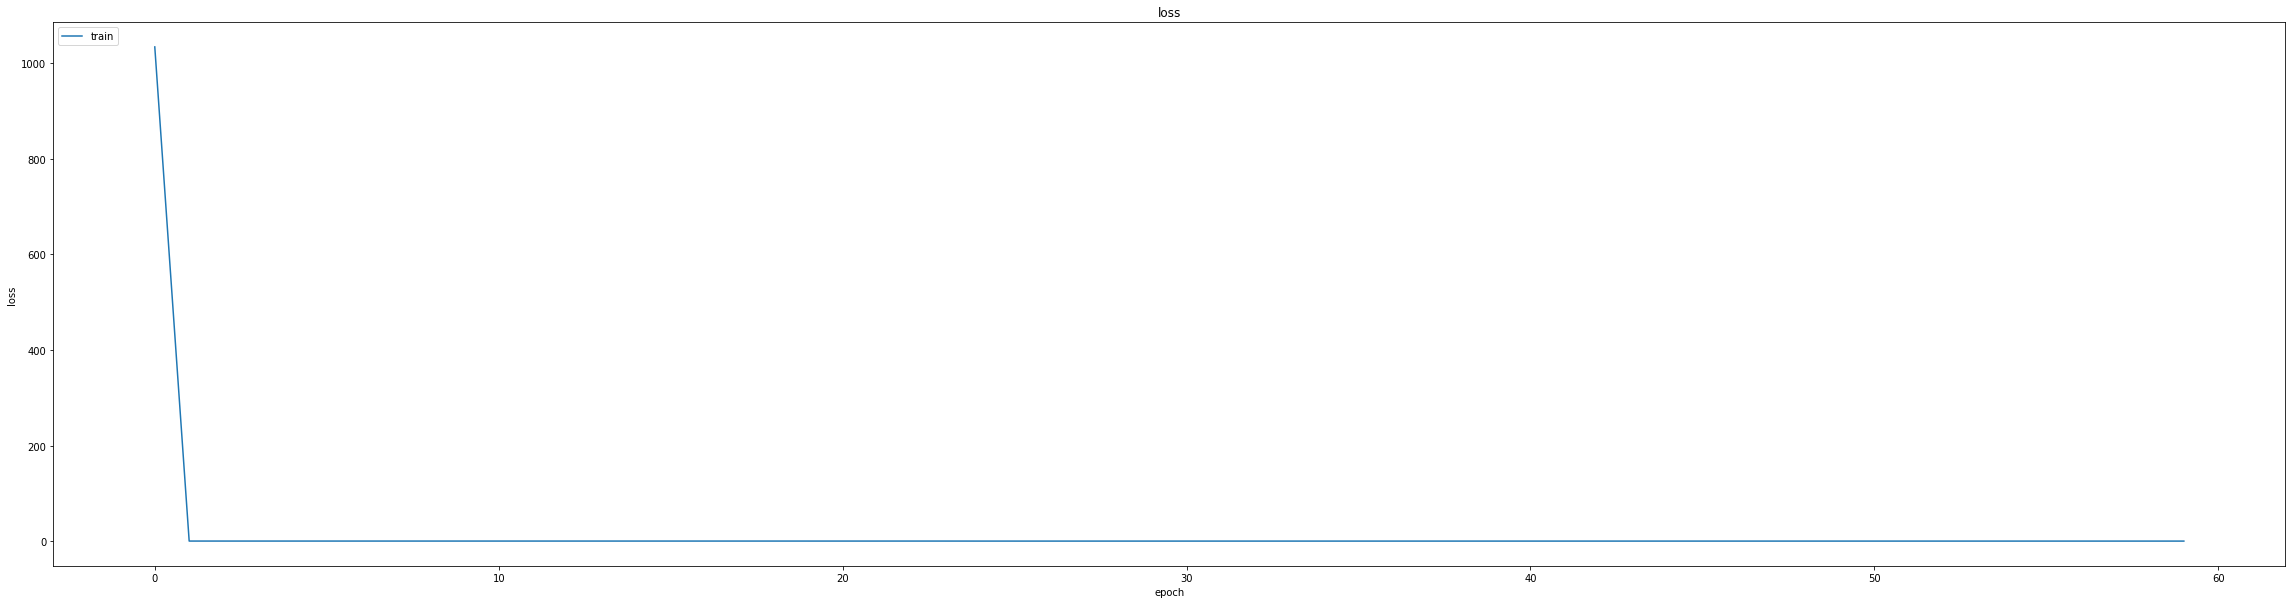

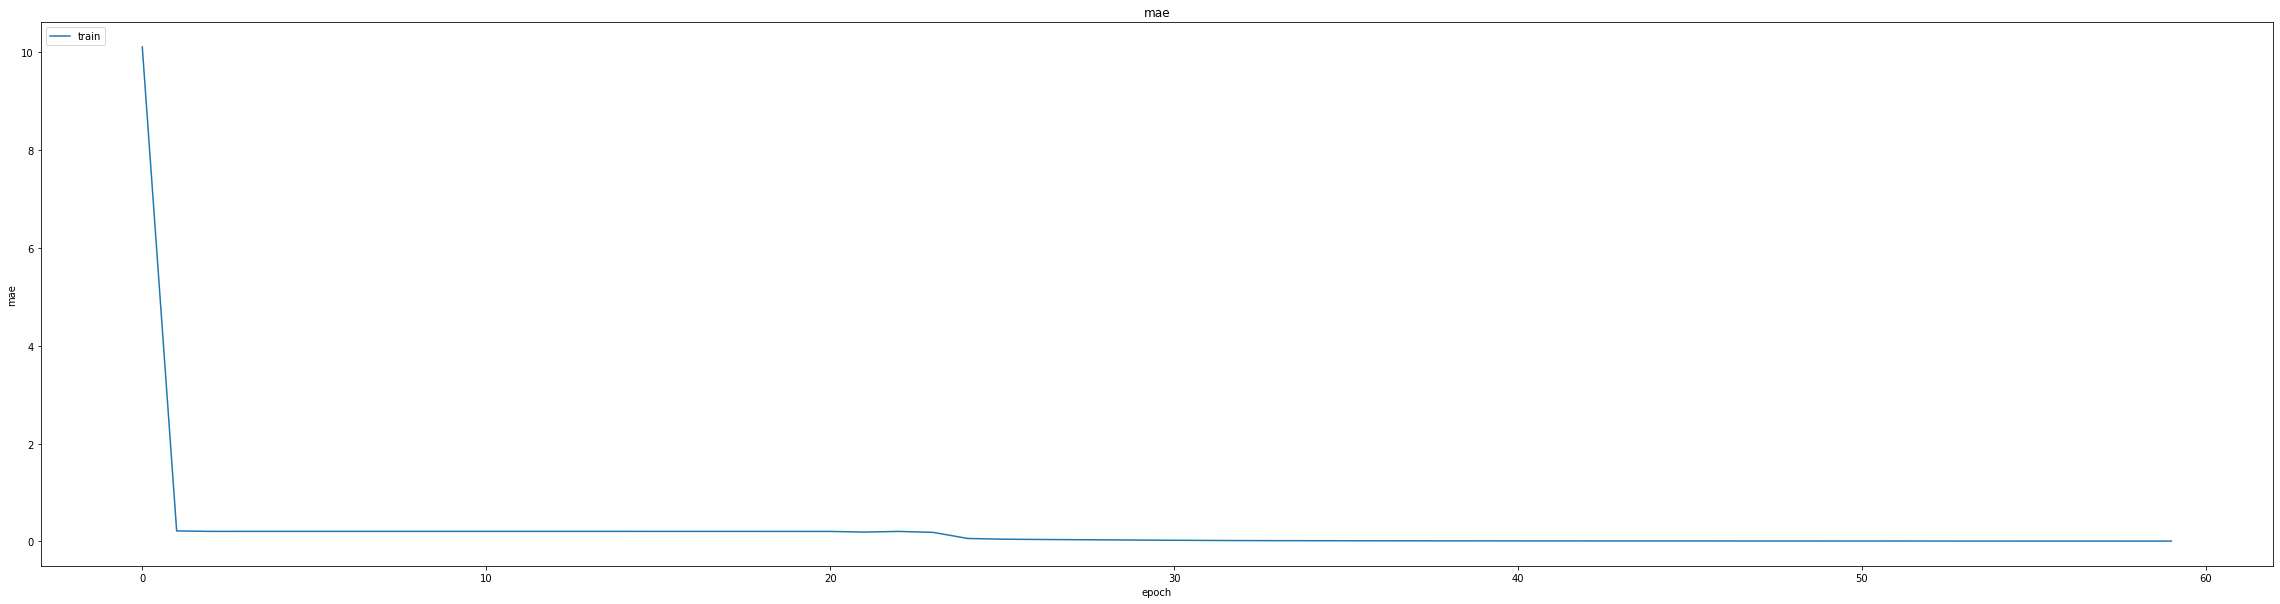

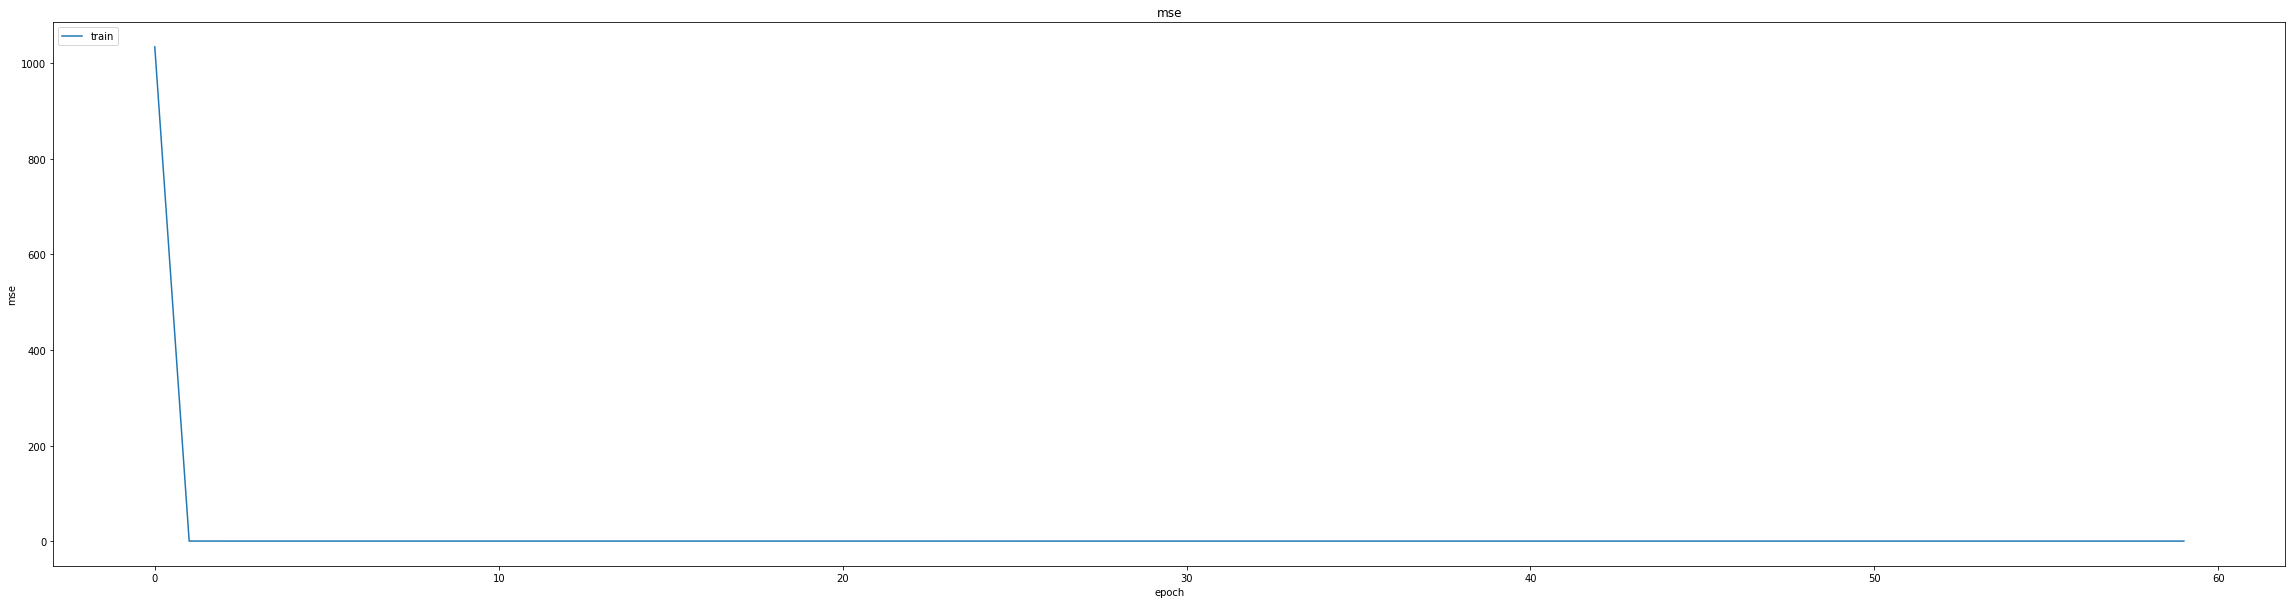

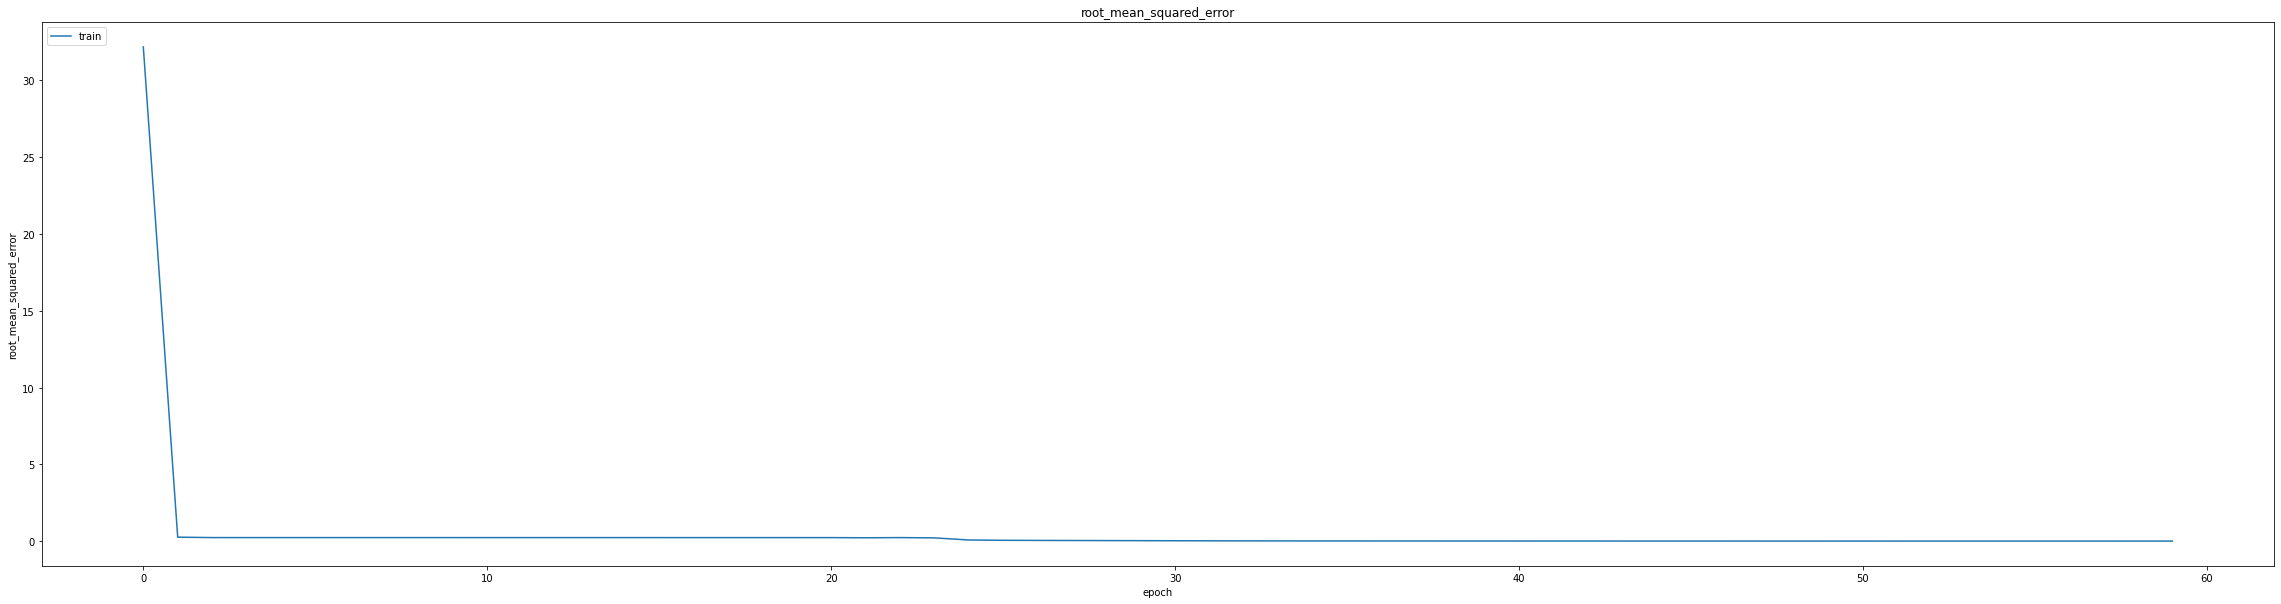

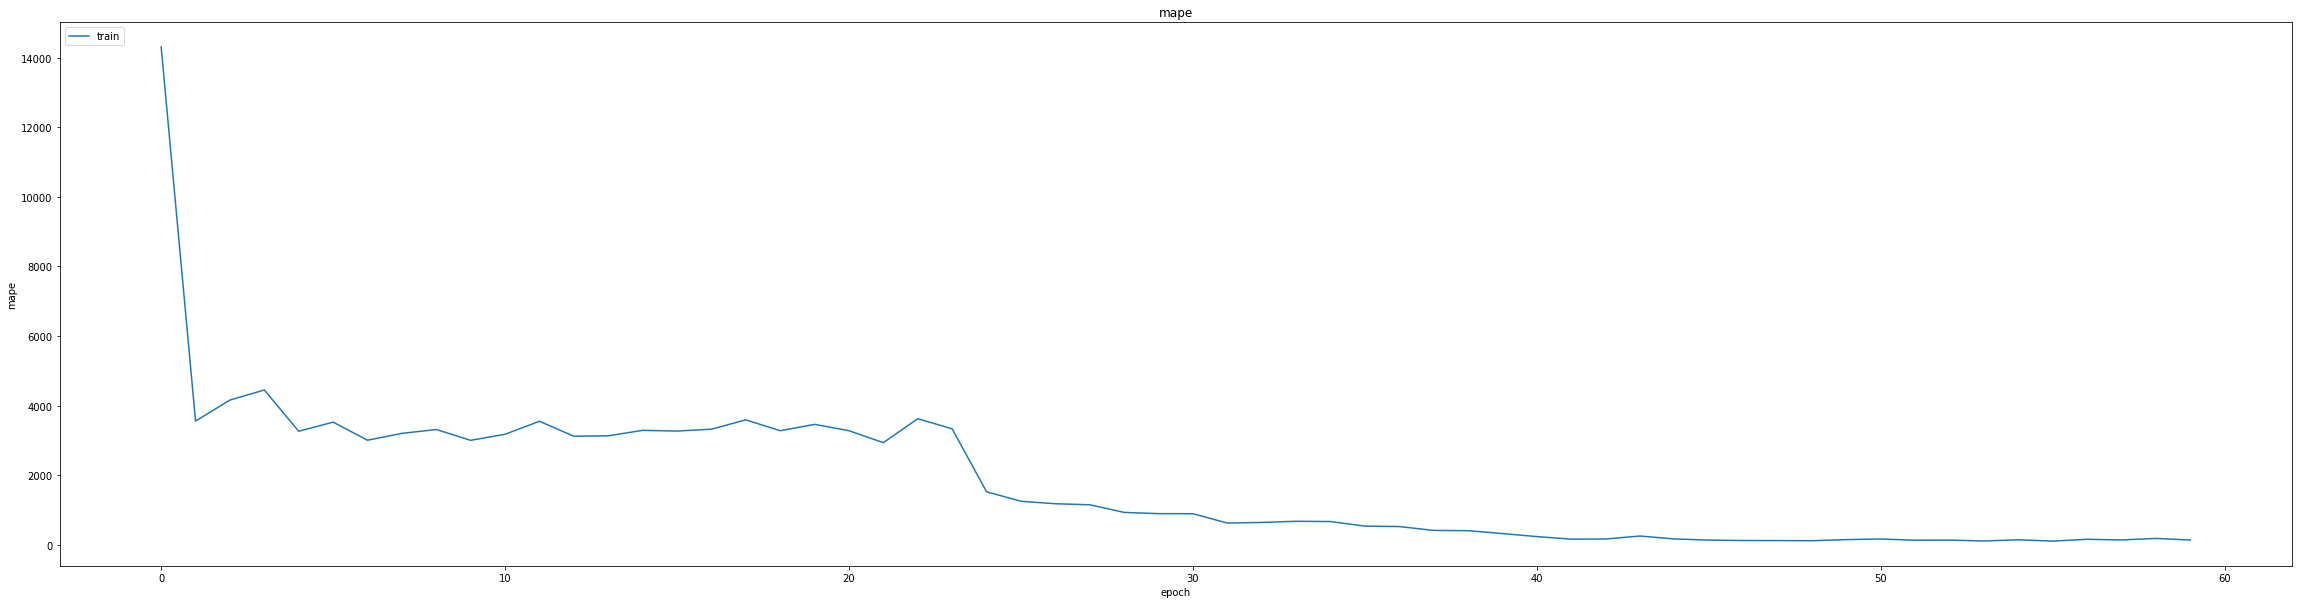

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011627187952399254
0.01663546822965145
687/687 [==============================] - 4s 4ms/step
0.9963086459239003


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD5_LSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
462/463 [============================>.] - ETA: 0s - loss: 3.2880e-04 - mae: 0.0087 - mse: 3.2880e-04 - root_mean_squared_error: 0.0181 - mape: 134.3941
Epoch 1: val_mse did not improve from 0.00028
463/463 [==============================] - 13s 18ms/step - loss: 3.2829e-04 - mae: 0.0087 - mse: 3.2829e-04 - root_mean_squared_error: 0.0181 - mape: 134.1514 - val_loss: 3.0729e-04 - val_mae: 0.0124 - val_mse: 3.0729e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 850.3219 - lr: 0.0010
Epoch 2/20
461/463 [============================>.] - ETA: 0s - loss: 5.0575e-05 - mae: 0.0054 - mse: 5.0575e-05 - root_mean_squared_error: 0.0071 - mape: 111.8062
Epoch 2: val_mse improved from 0.00028 to 0.00026, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 39ms/step - loss: 5.0563e-05 - mae: 0.0054 - mse: 5.0563e-05 - root_mean_squared_error: 0.0071 - mape: 111.3653 - val_loss: 2.6153e-04 - val_mae: 0.0114 - val_mse: 2.6153e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 941.6520 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
462/463 [============================>.] - ETA: 0s - loss: 5.1634e-05 - mae: 0.0055 - mse: 5.1634e-05 - root_mean_squared_error: 0.0072 - mape: 88.5618
Epoch 3: val_mse improved from 0.00026 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 5.1614e-05 - mae: 0.0055 - mse: 5.1614e-05 - root_mean_squared_error: 0.0072 - mape: 88.4028 - val_loss: 2.1741e-04 - val_mae: 0.0102 - val_mse: 2.1741e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 1337.6503 - lr: 9.0000e-04
Epoch 4/20
461/463 [============================>.] - ETA: 0s - loss: 6.3747e-05 - mae: 0.0062 - mse: 6.3747e-05 - root_mean_squared_error: 0.0080 - mape: 96.6094
Epoch 4: val_mse improved from 0.00022 to 0.00021, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 6.3654e-05 - mae: 0.0061 - mse: 6.3654e-05 - root_mean_squared_error: 0.0080 - mape: 96.2292 - val_loss: 2.0868e-04 - val_mae: 0.0099 - val_mse: 2.0868e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1402.7363 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
461/463 [============================>.] - ETA: 0s - loss: 5.3131e-05 - mae: 0.0057 - mse: 5.3131e-05 - root_mean_squared_error: 0.0073 - mape: 115.3940
Epoch 5: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 5.3058e-05 - mae: 0.0057 - mse: 5.3058e-05 - root_mean_squared_error: 0.0073 - mape: 114.9400 - val_loss: 1.9152e-04 - val_mae: 0.0097 - val_mse: 1.9152e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1524.3805 - lr: 8.1000e-04
Epoch 6/20
460/463 [============================>.] - ETA: 0s - loss: 5.3474e-05 - mae: 0.0057 - mse: 5.3474e-05 - root_mean_squared_error: 0.0073 - mape: 134.1708
Epoch 6: val_mse did not improve from 0.00019
463/463 [==============================] - 8s 16ms/step - loss: 5.3561e-05 - mae: 0.0057 - mse: 5.3561e-05 - root_mean_squared_error: 0.0073 - mape: 133.3557 - val_loss: 2.2047e-04 - val_mae: 0.0112 - val_mse: 2.2047e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1437.2688 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
461/463 [============================>.] - ETA: 0s - loss: 4.1573e-05 - mae: 0.0050 - mse: 4.1573e-05 - root_mean_squared_error: 0.0064 - mape: 12

463/463 [==============================] - 19s 42ms/step - loss: 4.5336e-05 - mae: 0.0052 - mse: 4.5336e-05 - root_mean_squared_error: 0.0067 - mape: 125.5135 - val_loss: 1.5406e-04 - val_mae: 0.0088 - val_mse: 1.5406e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1436.6068 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
462/463 [============================>.] - ETA: 0s - loss: 3.7214e-05 - mae: 0.0047 - mse: 3.7214e-05 - root_mean_squared_error: 0.0061 - mape: 103.7290
Epoch 9: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 18s 40ms/step - loss: 3.7197e-05 - mae: 0.0047 - mse: 3.7197e-05 - root_mean_squared_error: 0.0061 - mape: 103.5415 - val_loss: 1.3822e-04 - val_mae: 0.0082 - val_mse: 1.3822e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1640.5099 - lr: 6.5610e-04
Epoch 10/20
462/463 [============================>.] - ETA: 0s - loss: 4.0064e-05 - mae: 0.0049 - mse: 4.0064e-05 - root_mean_squared_error: 0.0063 - mape: 134.7371
Epoch 10: val_mse did not improve from 0.00014
463/463 [==============================] - 7s 16ms/step - loss: 4.0045e-05 - mae: 0.0049 - mse: 4.0045e-05 - root_mean_squared_error: 0.0063 - mape: 134.4932 - val_loss: 1.6383e-04 - val_mae: 0.0097 - val_mse: 1.6383e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1601.5887 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
460/463 [============================>.] - ETA: 0s - loss: 3.8364e-05 - mae: 0.0046 - mse: 3.8364e-05 - root_mean_squared_error: 0.0062 - mape:

463/463 [==============================] - 19s 40ms/step - loss: 2.5242e-05 - mae: 0.0039 - mse: 2.5242e-05 - root_mean_squared_error: 0.0050 - mape: 88.1147 - val_loss: 1.2607e-04 - val_mae: 0.0083 - val_mse: 1.2607e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1711.3730 - lr: 5.3144e-04
Epoch 14/20
463/463 [==============================] - ETA: 0s - loss: 2.7804e-05 - mae: 0.0041 - mse: 2.7804e-05 - root_mean_squared_error: 0.0053 - mape: 124.1053
Epoch 14: val_mse did not improve from 0.00013
463/463 [==============================] - 7s 15ms/step - loss: 2.7804e-05 - mae: 0.0041 - mse: 2.7804e-05 - root_mean_squared_error: 0.0053 - mape: 124.1053 - val_loss: 1.5065e-04 - val_mae: 0.0093 - val_mse: 1.5065e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1589.1227 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
461/463 [============================>.] - ETA: 0s - loss: 2.3531e-05 - mae: 0.0037 - mse: 2.3531e-05 - root_mean_squared_error: 0.0049 - mape:

463/463 [==============================] - 18s 39ms/step - loss: 2.4909e-05 - mae: 0.0039 - mse: 2.4909e-05 - root_mean_squared_error: 0.0050 - mape: 89.5223 - val_loss: 9.4754e-05 - val_mae: 0.0069 - val_mse: 9.4754e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 1560.2654 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
461/463 [============================>.] - ETA: 0s - loss: 1.9584e-05 - mae: 0.0034 - mse: 1.9584e-05 - root_mean_squared_error: 0.0044 - mape: 95.7981
Epoch 17: val_mse improved from 0.00009 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD5_LSTM


463/463 [==============================] - 19s 40ms/step - loss: 1.9566e-05 - mae: 0.0034 - mse: 1.9566e-05 - root_mean_squared_error: 0.0044 - mape: 95.4195 - val_loss: 8.0976e-05 - val_mae: 0.0063 - val_mse: 8.0976e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 1500.0981 - lr: 4.3047e-04
Epoch 18/20
462/463 [============================>.] - ETA: 0s - loss: 2.2365e-05 - mae: 0.0036 - mse: 2.2365e-05 - root_mean_squared_error: 0.0047 - mape: 116.6475
Epoch 18: val_mse did not improve from 0.00008
463/463 [==============================] - 7s 16ms/step - loss: 2.2346e-05 - mae: 0.0036 - mse: 2.2346e-05 - root_mean_squared_error: 0.0047 - mape: 116.4360 - val_loss: 1.0597e-04 - val_mae: 0.0074 - val_mse: 1.0597e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 1359.4186 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
460/463 [============================>.] - ETA: 0s - loss: 1.6748e-05 - mae: 0.0032 - mse: 1.6748e-05 - root_mean_squared_error: 0.0041 - mape:

463/463 [==============================] - 18s 40ms/step - loss: 1.6761e-05 - mae: 0.0032 - mse: 1.6761e-05 - root_mean_squared_error: 0.0041 - mape: 104.3600 - val_loss: 7.1433e-05 - val_mae: 0.0059 - val_mse: 7.1433e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1454.5299 - lr: 3.8742e-04
Epoch 20/20
460/463 [============================>.] - ETA: 0s - loss: 1.7306e-05 - mae: 0.0032 - mse: 1.7306e-05 - root_mean_squared_error: 0.0042 - mape: 86.8723
Epoch 20: val_mse did not improve from 0.00007
463/463 [==============================] - 7s 16ms/step - loss: 1.7336e-05 - mae: 0.0032 - mse: 1.7336e-05 - root_mean_squared_error: 0.0042 - mape: 86.3443 - val_loss: 8.3539e-05 - val_mae: 0.0066 - val_mse: 8.3539e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 1510.8127 - lr: 3.8742e-04


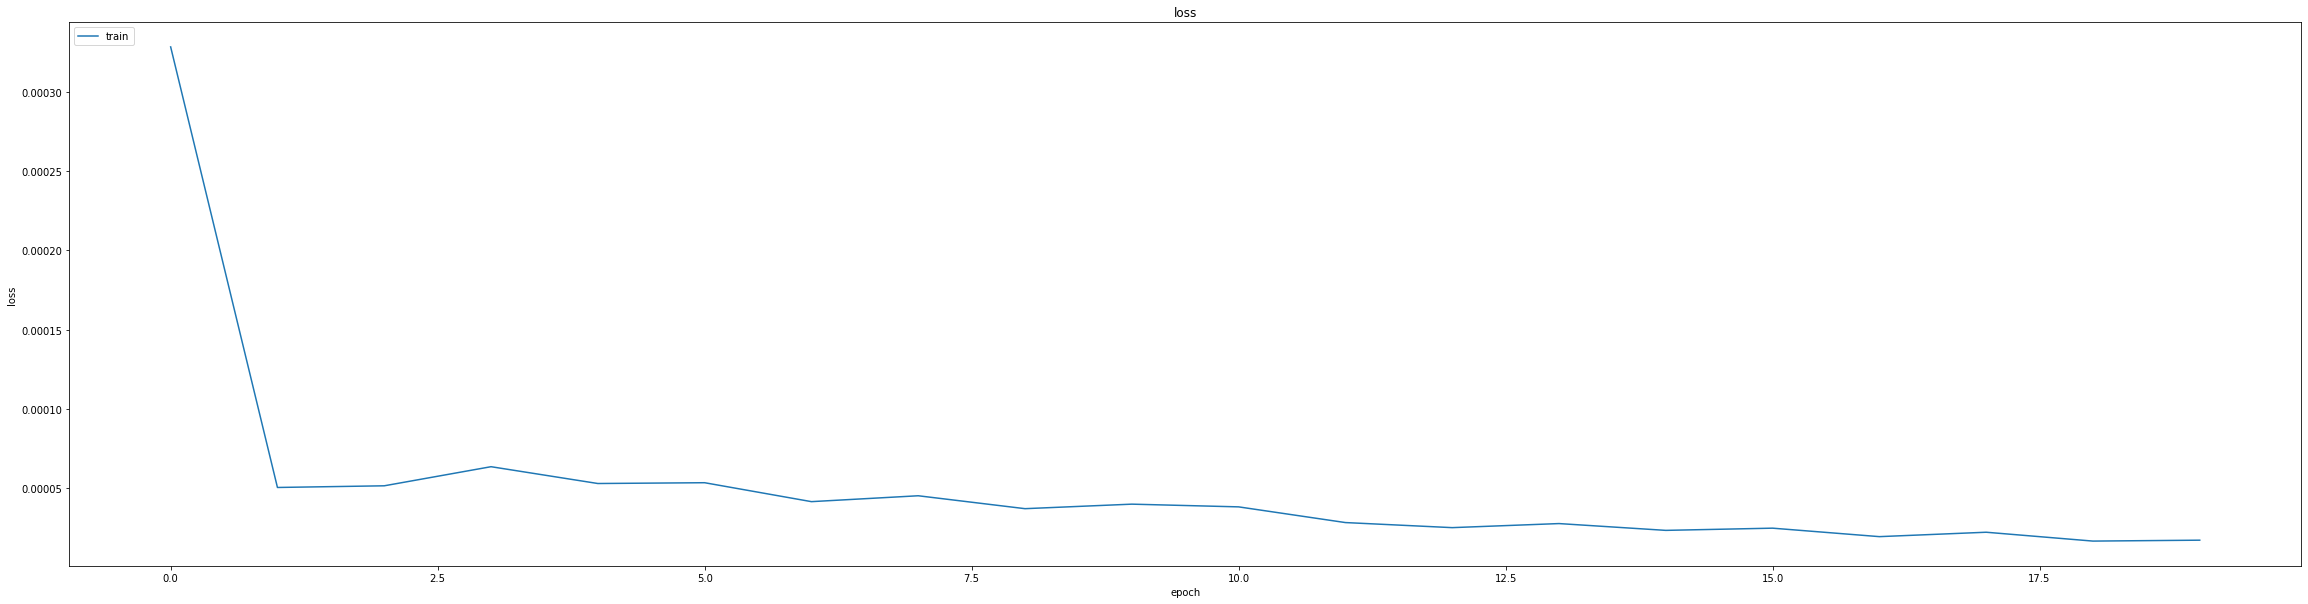

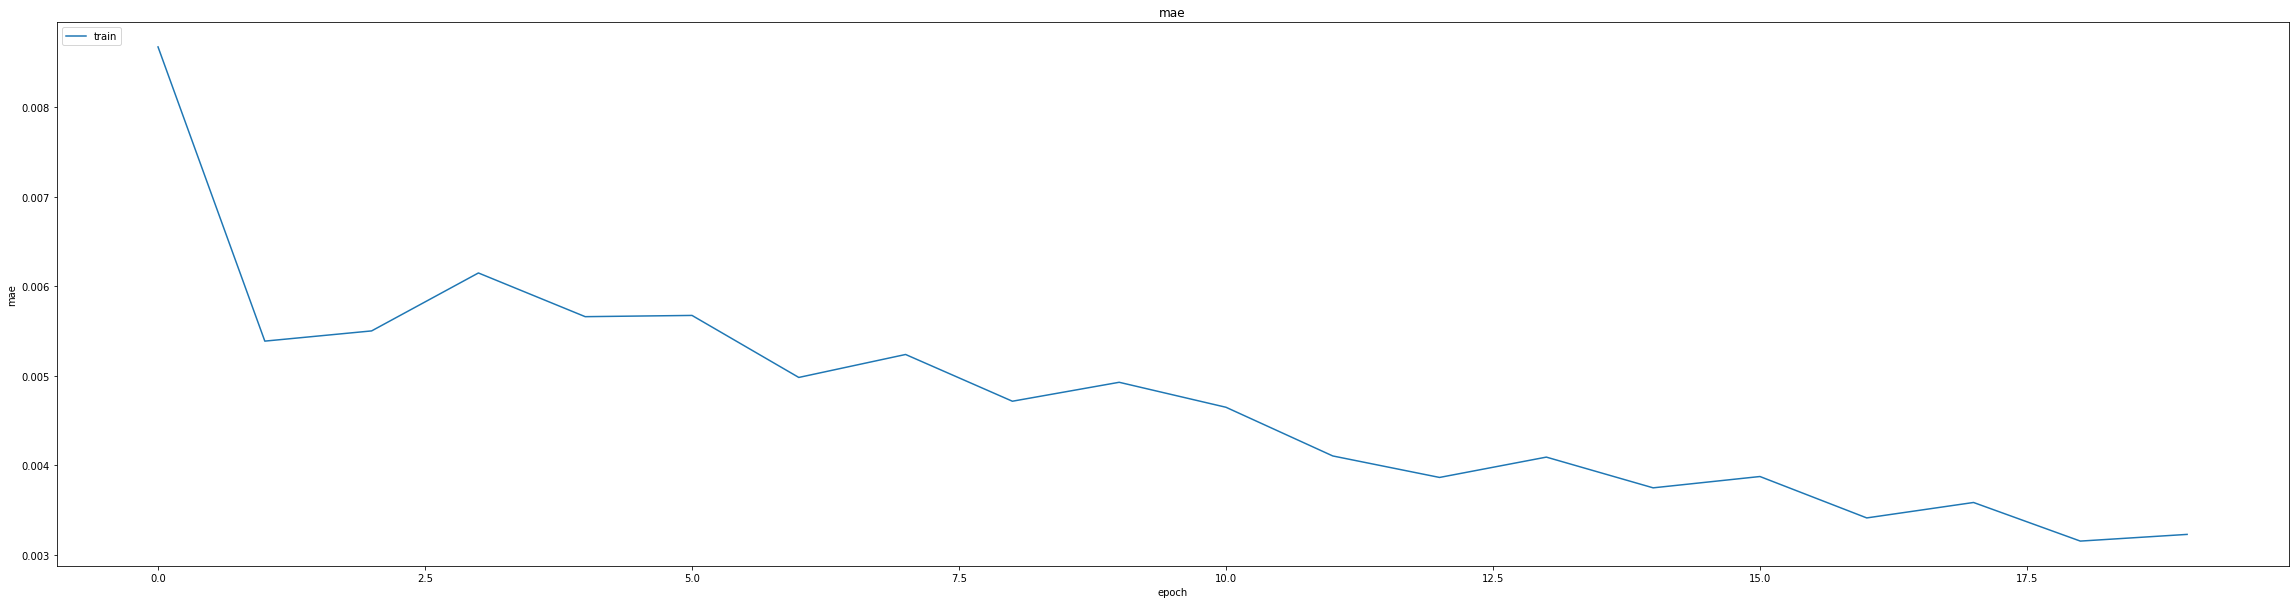

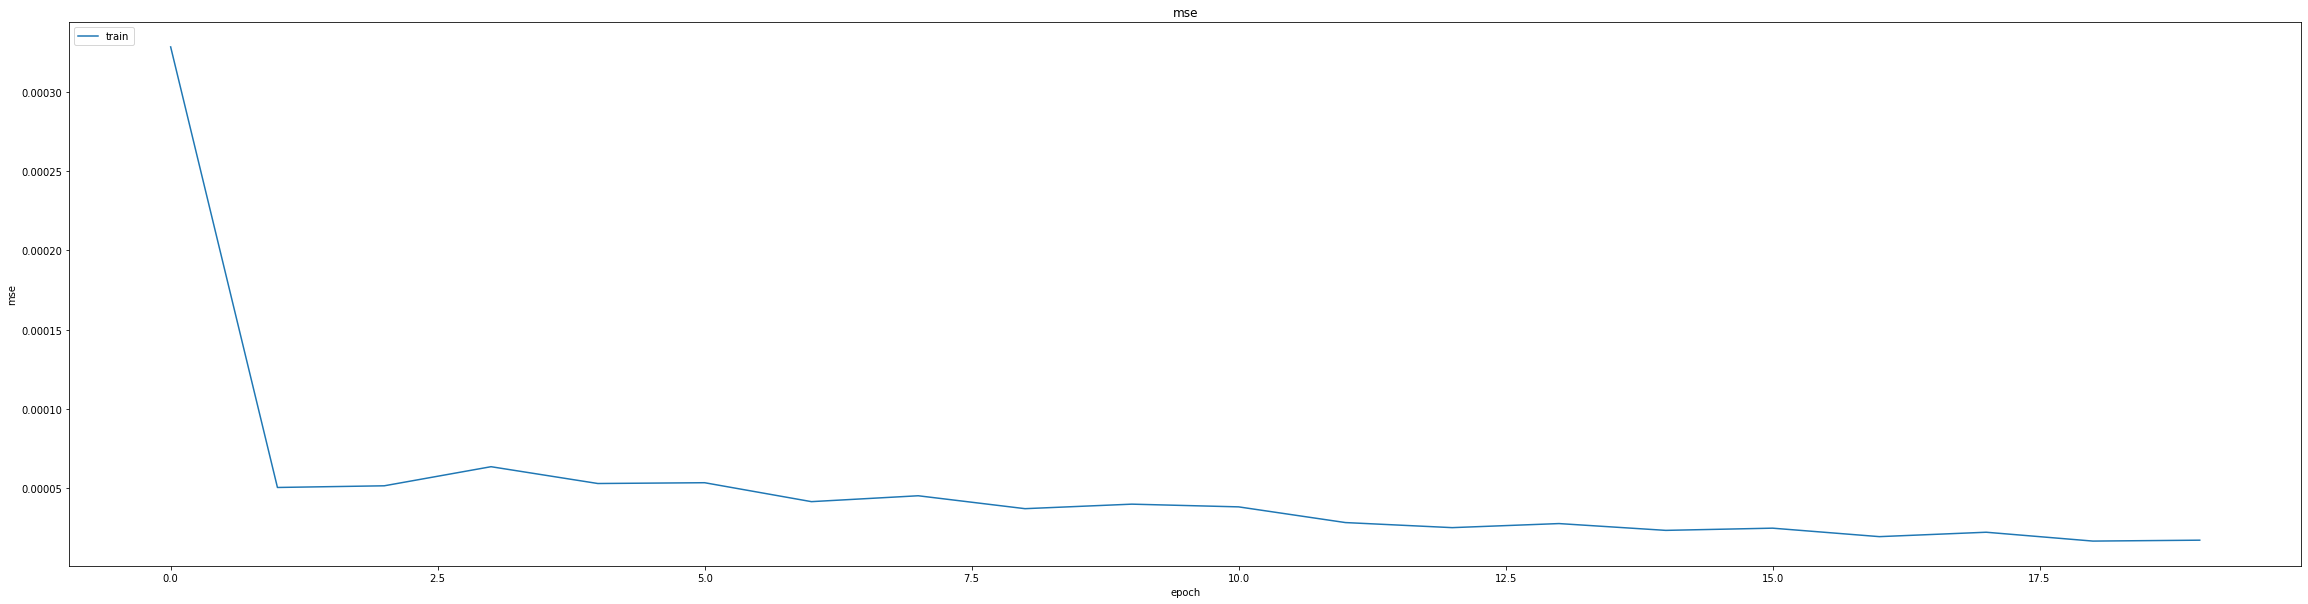

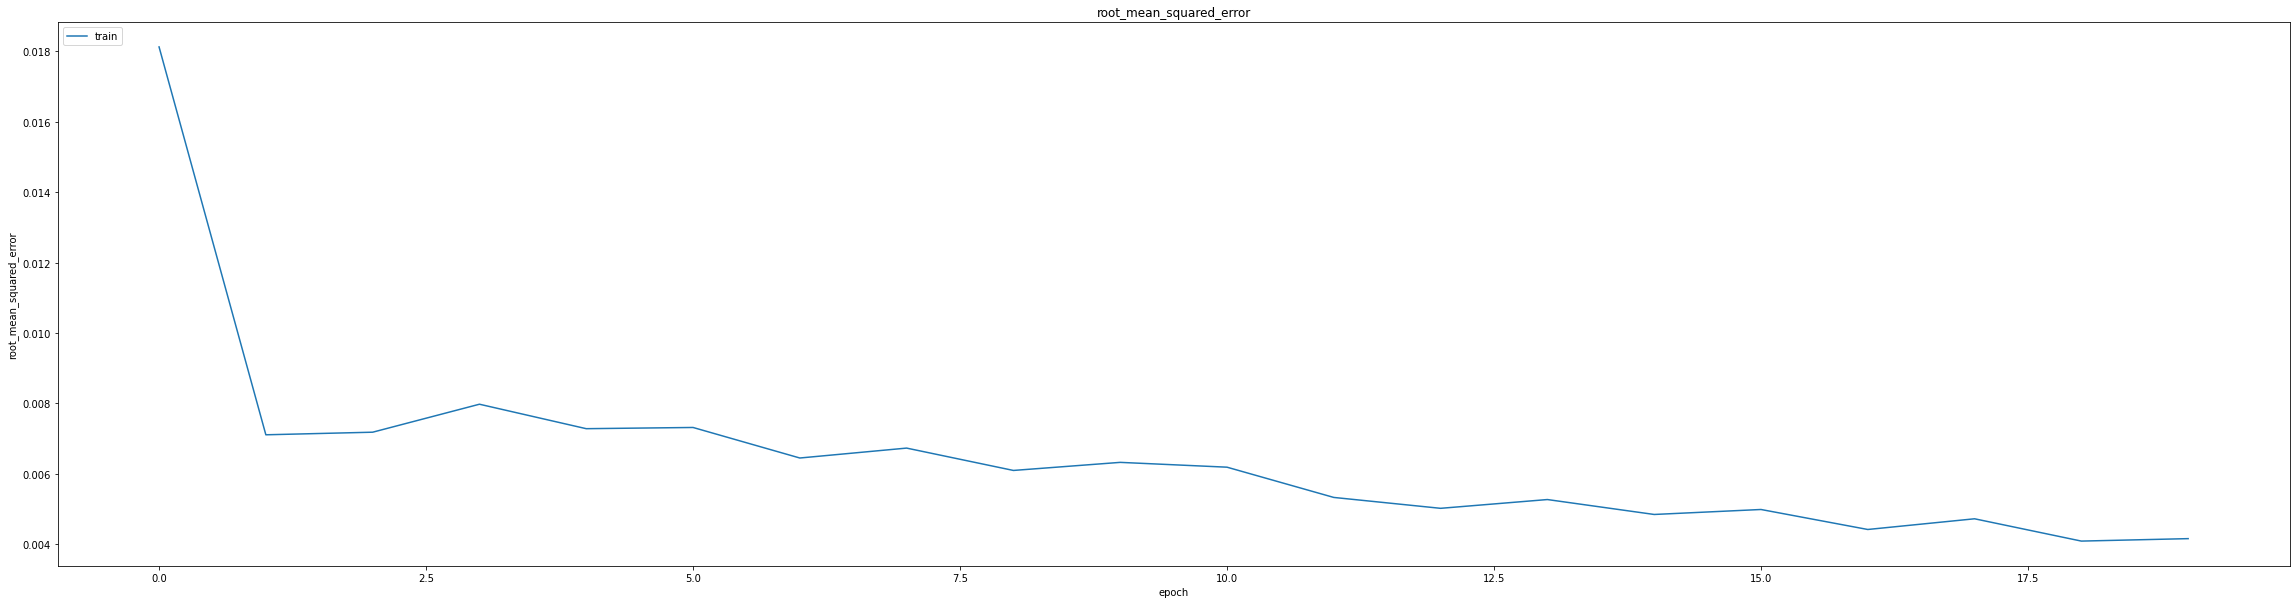

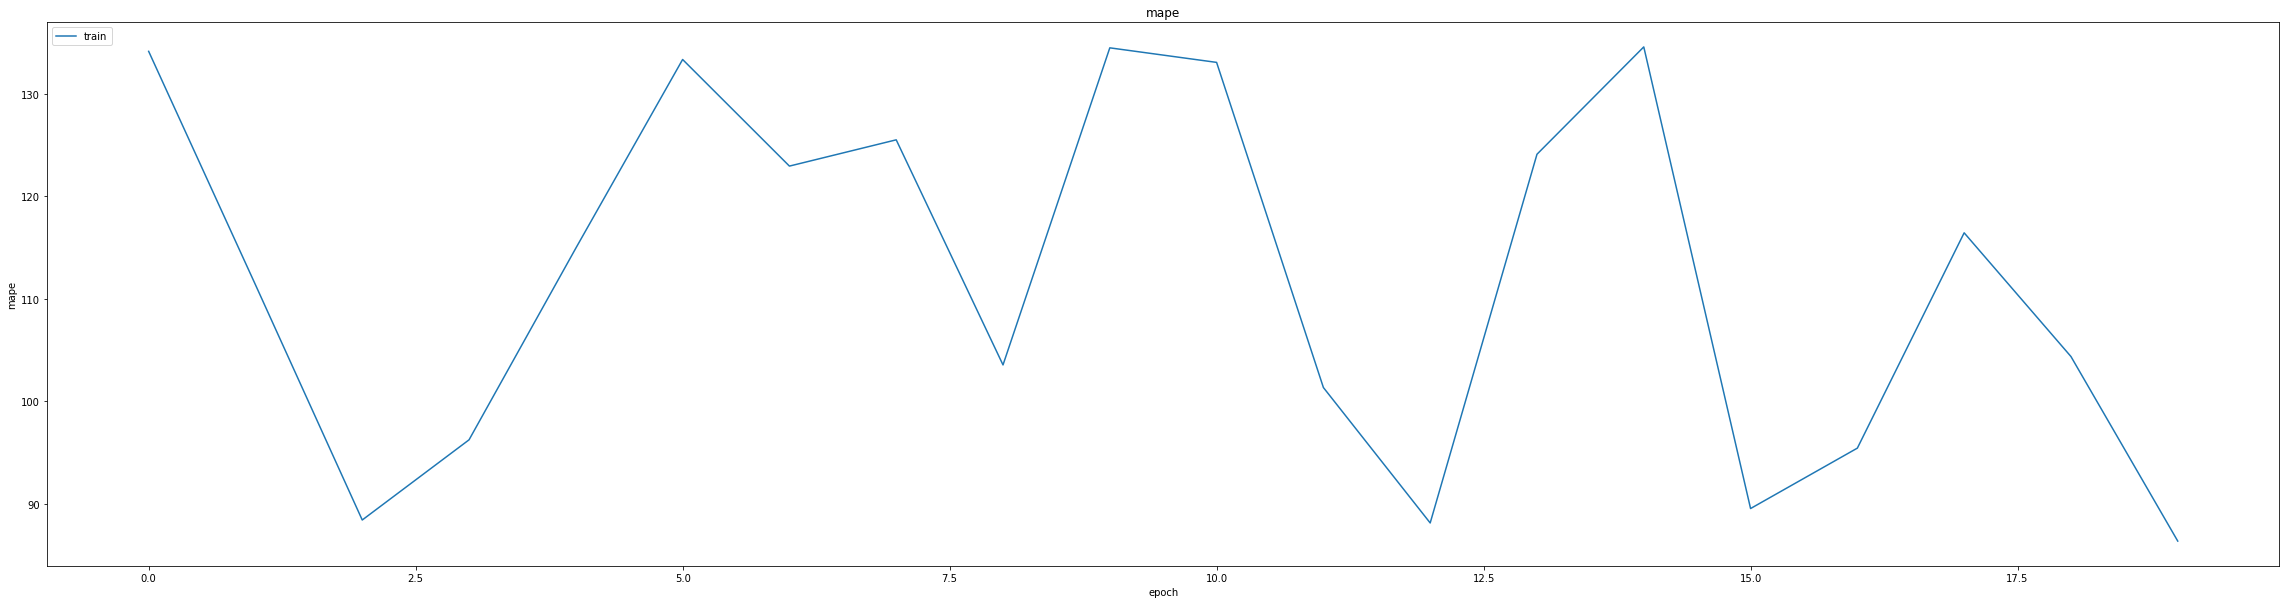

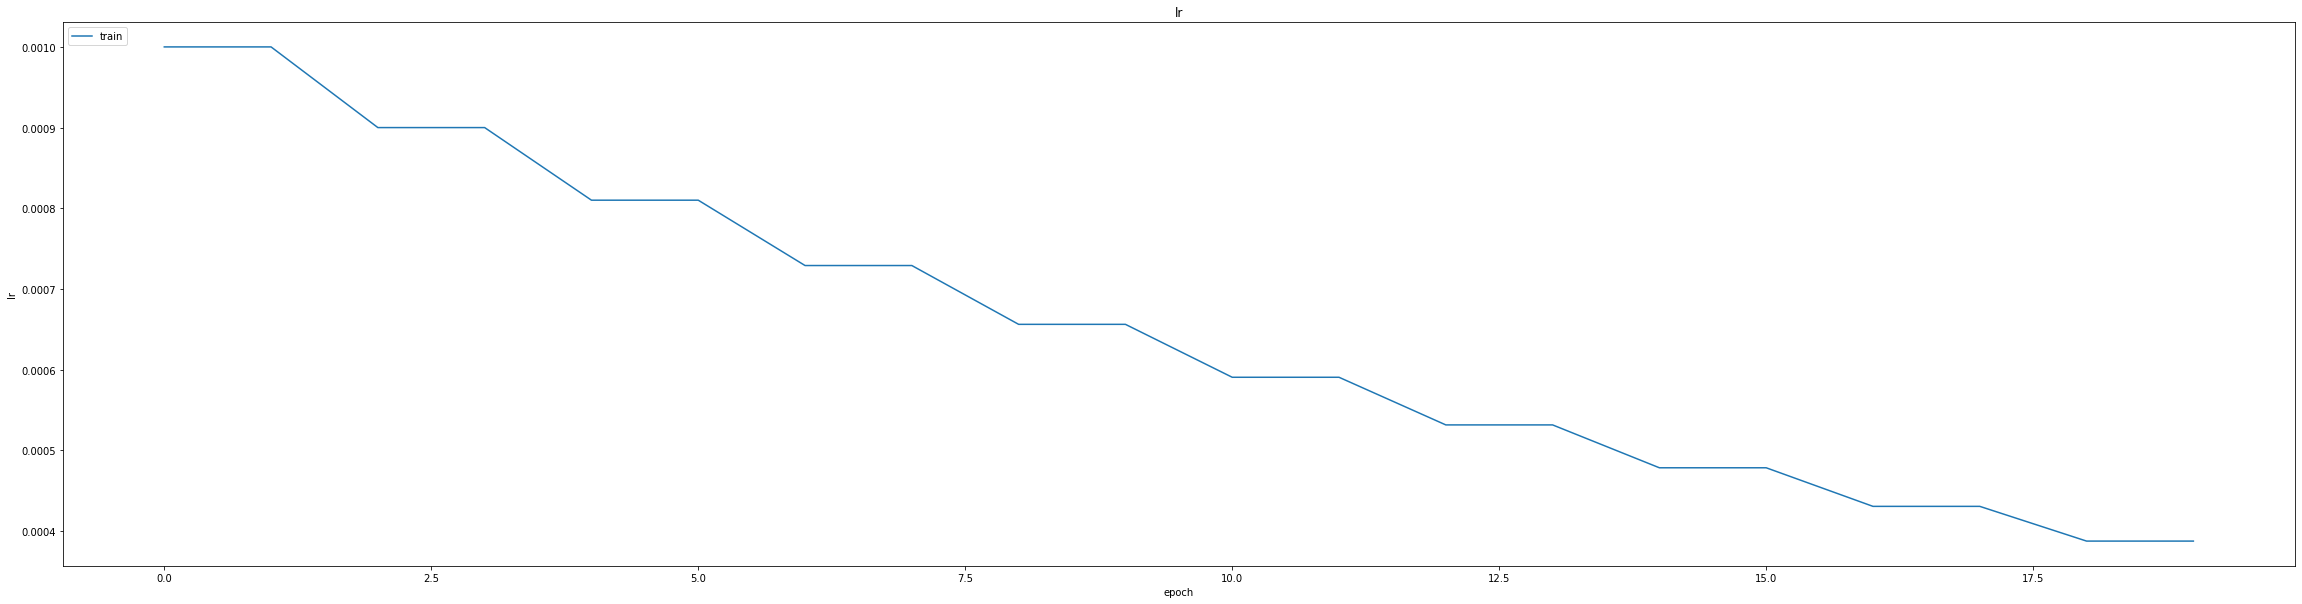

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005856689065694809
0.008451806381344795
687/687 [==============================] - 4s 4ms/step
0.9989523080004471


687/687 [==============================] - 3s 4ms/step


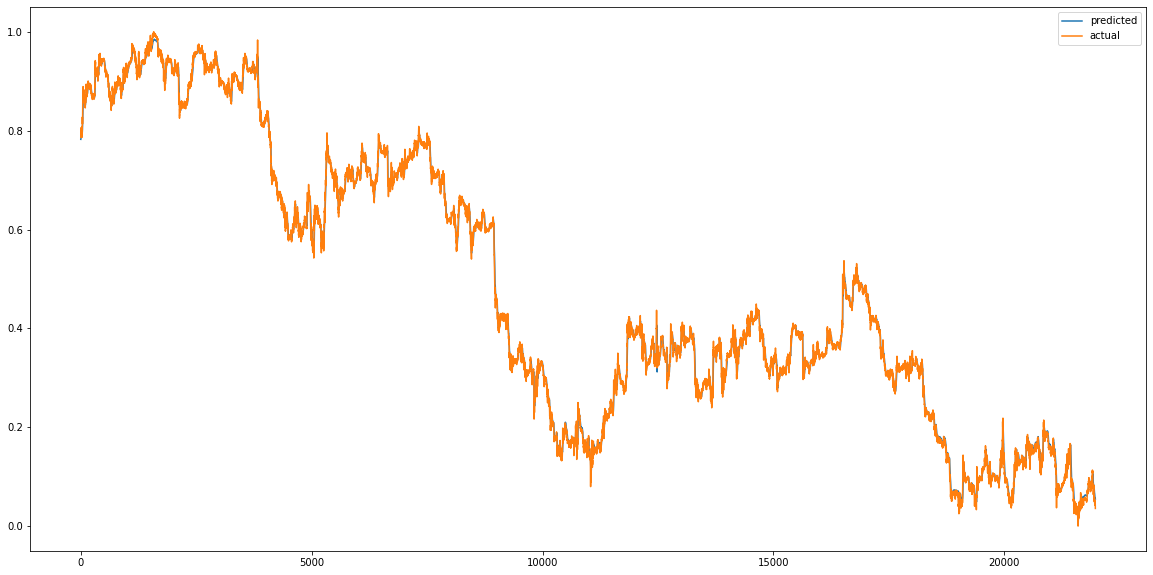

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD5_LSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


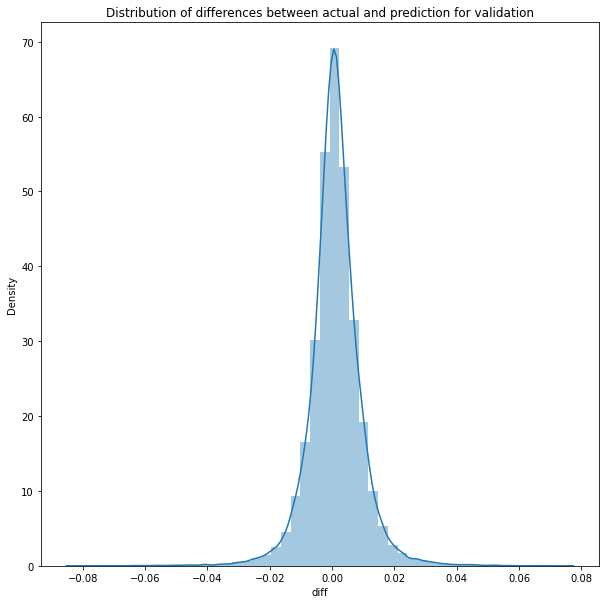

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

705/705 [==============================] - 3s 4ms/step


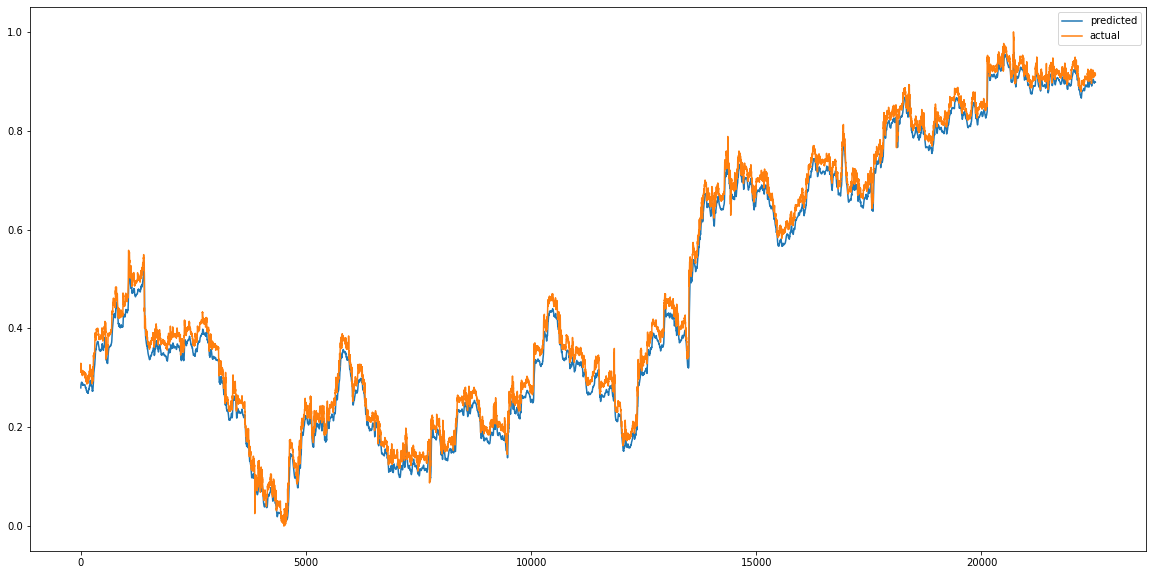

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


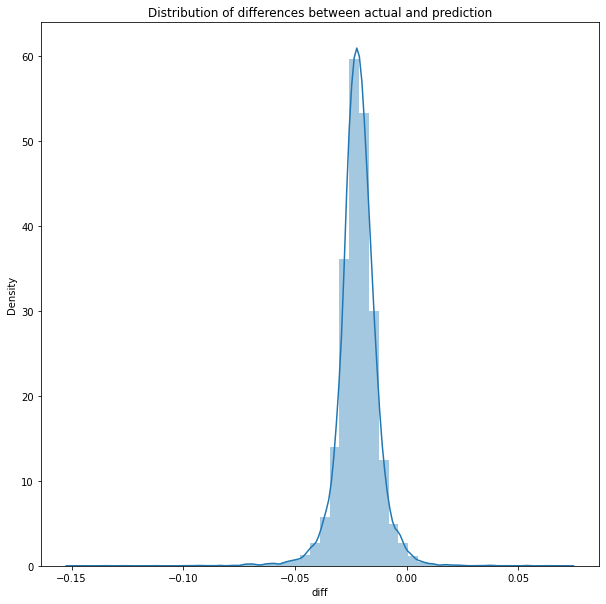

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005562133226278627
MAE :  0.022024857398714494
RMSE  : 0.02358417525858945
705/705 [==============================] - 3s 4ms/step
R2_Score  : 0.9923750082401976


count    22530.000000
mean        -0.021841
std          0.008900
min         -0.148871
25%         -0.026104
50%         -0.021870
75%         -0.017306
max          0.071149
Name: diff, dtype: float64